In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("telecom_churn.csv")

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# Визуализация зависимостей между признаками

# 1. Признаки по одному

## 1.1. Количественные

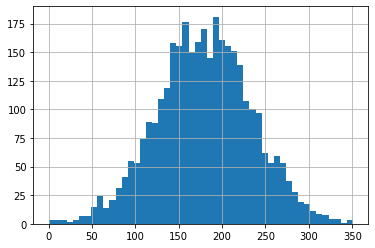

In [ ]:
df["Total day minutes"].hist(bins=50); # гистограмма распределения признака

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


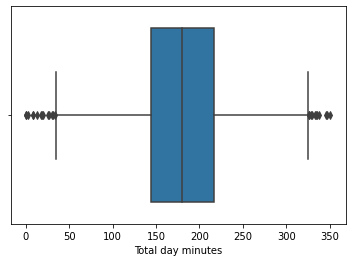

In [ ]:
sns.boxplot(df["Total day minutes"]); # ящик с усами (boxplot)

## 1.2. Категориальные (качественные)

In [ ]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [ ]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

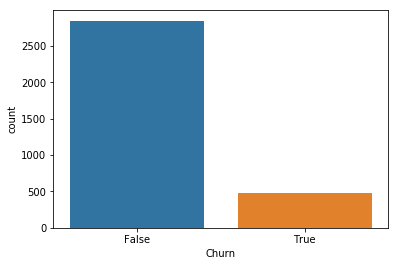

In [ ]:
sns.countplot(df["Churn"]); # график распределения по категорим (количество объектов по всем категорим переменной)

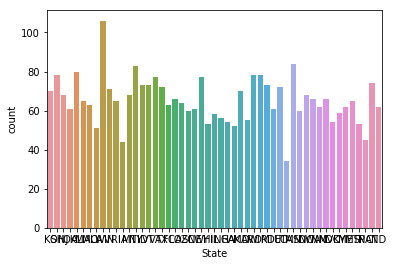

In [ ]:
sns.countplot(df["State"]);

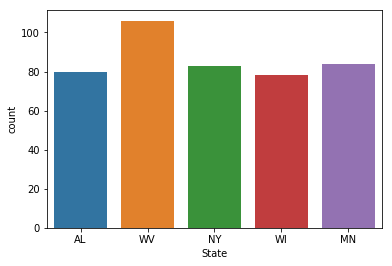

In [ ]:
sns.countplot(df[df["State"].isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействия признаков

## 2.1. Количественный с количественным

In [ ]:
feat = [f for f in df.columns if "charge" in f] # выбор удовлетворяющих условию колонок
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

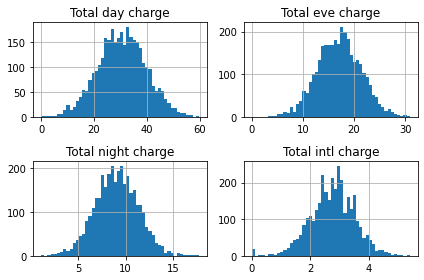

In [ ]:
df[feat].hist(bins = 50); # гистограммы распределения
plt.tight_layout()

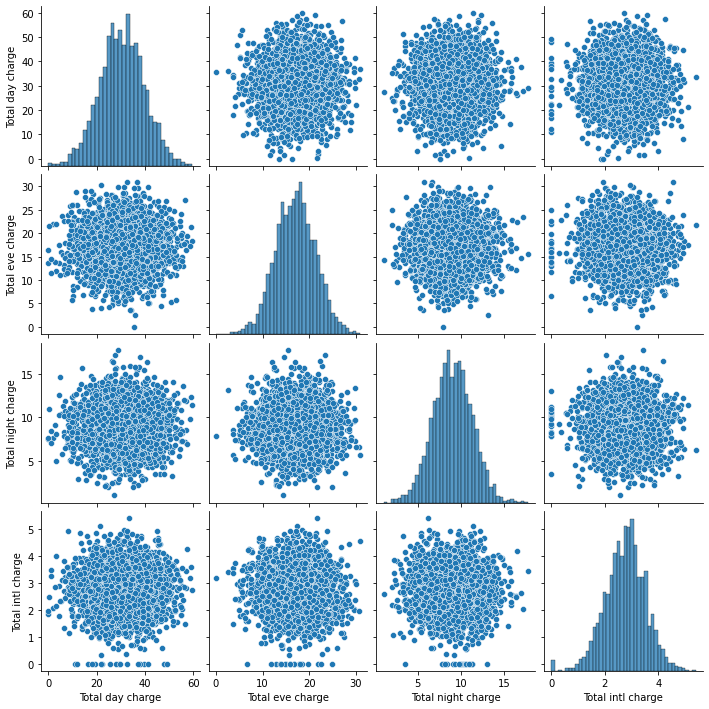

In [ ]:
sns.pairplot(df[feat]);

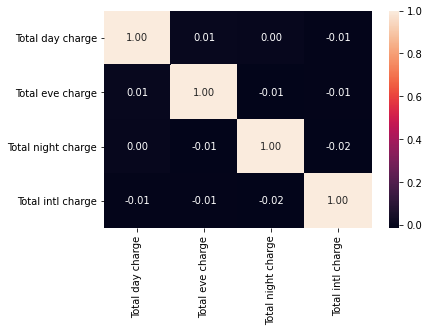

In [ ]:
sns.heatmap(df[feat].corr(), annot=True, fmt=".2f") # визуализация корреляционной матрицы

In [ ]:
df_int = df.select_dtypes(include="int64") # выбор признаков типа int64
#["int64", "float64"] - для выбора нескольких типов данных

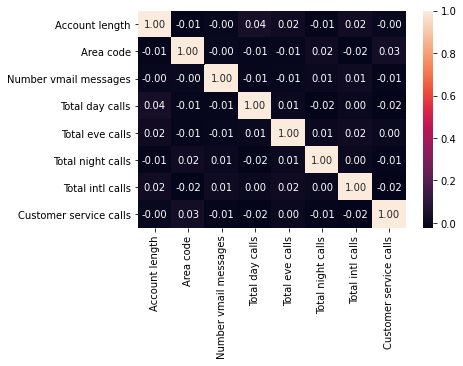

In [ ]:
sns.heatmap(df_int.corr(), annot=True, fmt=".2f") # визуализация корреляционной матрицы

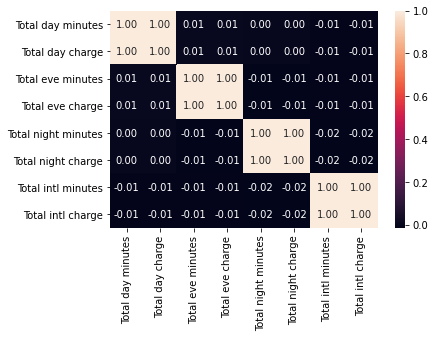

In [ ]:
df_float = df.select_dtypes(include="float64") # выбор признаков типа float64
sns.heatmap(df_float.corr(), annot=True, fmt=".2f") # визуализация корреляционной матрицы
# на корр. матрице видим максимальные корреляции между некоторыми признаками

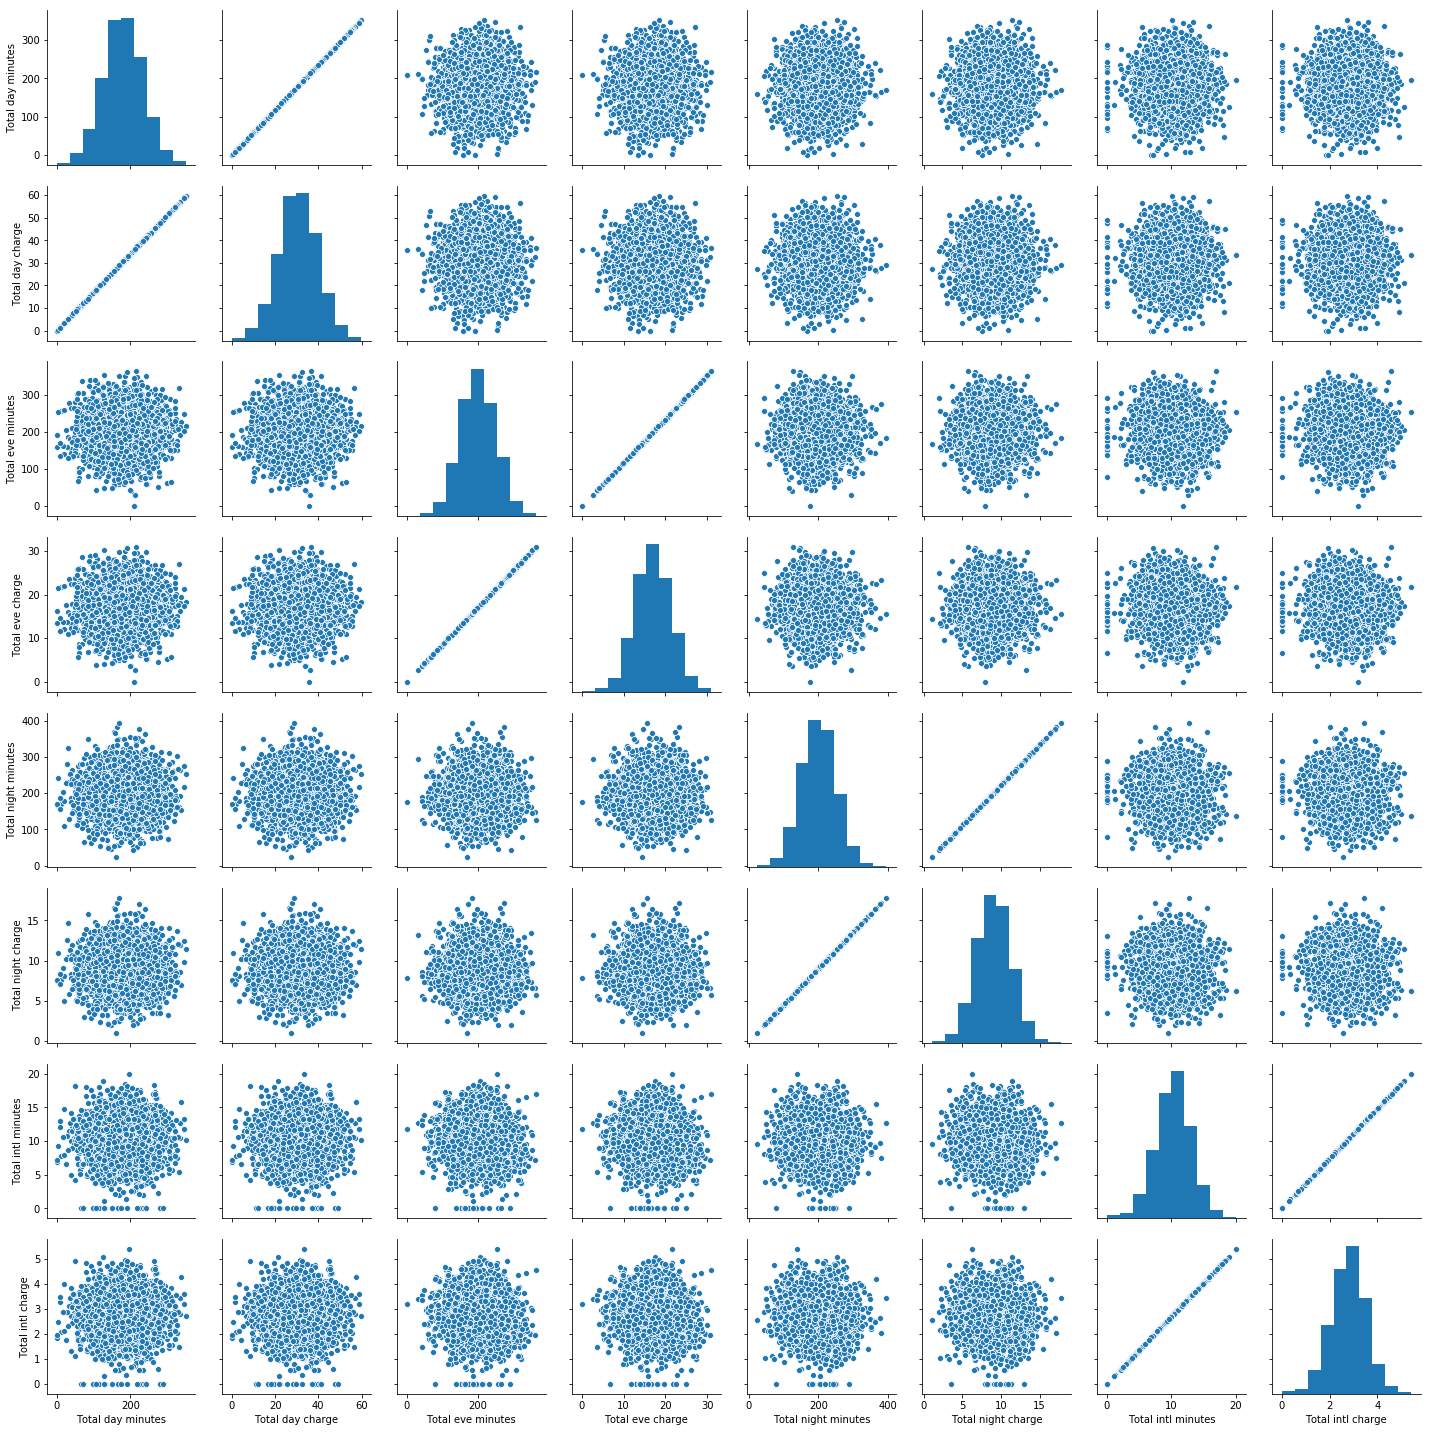

In [ ]:
sns.pairplot(df_float); # видим идеальную корреляцию между признаками возле главной диагонали

### Кодирование переменной

In [ ]:
df["Churn"].unique()

array([False,  True])

In [ ]:
d = {False: 0, True: 1} # создаем словарь для дальнейшего кодирования переменной

In [ ]:
df["Churn"] = df["Churn"].map(d) # применяем ранее созданный словарь к переменной

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
d = {"No": 0, "Yes": 1} # создаем словарь для дальнейшего кодирования переменной

In [ ]:
df["International plan"] = df["International plan"].map(d) # применяем ранее созданный словарь к переменной

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2.2. Количественный с категориальным (качественным)

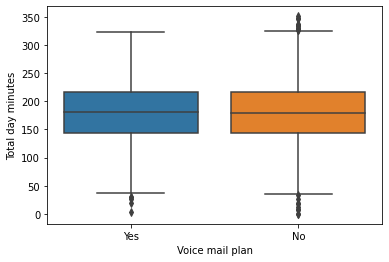

In [ ]:
sns.boxplot(x="Voice mail plan", y = "Total day minutes", data = df);

In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,0,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,0,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,1,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
state = df["State"].value_counts().head().index

In [ ]:
l_state = list(df[df["State"].isin(state)]["State"].unique())

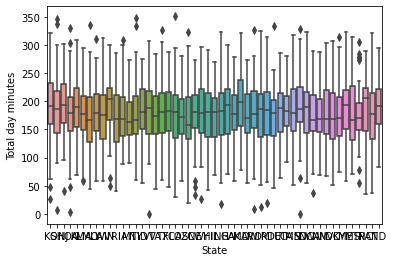

In [ ]:
sns.boxplot(x = "State", y = "Total day minutes", data = df)

In [ ]:
l_state

['OH', 'AL', 'WV', 'NY', 'MN']

In [ ]:
df_new = df[(df["State"] == 'AL') | (df["State"] == 'WV')] # выбираем нужные штаты

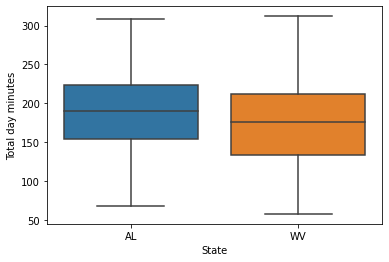

In [ ]:
sns.boxplot(x = "State", y = "Total day minutes", data = df_new) # строим boxplots вбранных штатов

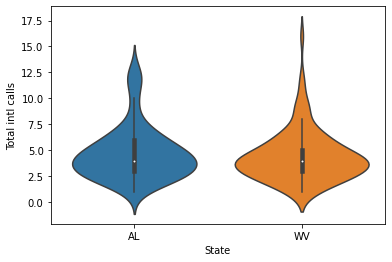

In [ ]:
sns.violinplot(x = "State", y = "Total intl calls", data = df_new)

## 2.3. Категориальный с категориальным

In [ ]:
d_churn = {0: False, 1:True} # возвращаем обратно Churn
df["Churn"] = df["Churn"].map(d_churn)

In [ ]:
pd.crosstab(df["Churn"], df["Voice mail plan"]) # кросс-таблица двух категор. признаков

Voice mail plan,No,Yes
Churn,,
False,2008,842
True,403,80


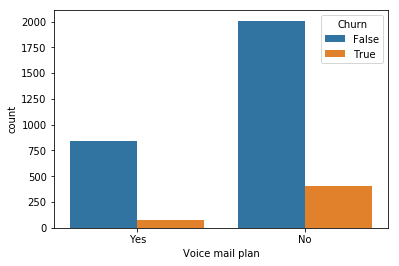

In [ ]:
sns.countplot(x="Voice mail plan", hue = "Churn", data = df);

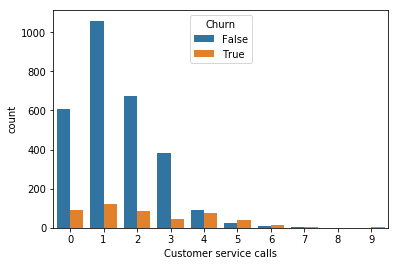

In [ ]:
sns.countplot(x="Customer service calls", hue = "Churn", data = df)